In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

sys.path.append('../utils/')
from dataloader import load_pkl_data

In [232]:
def plot_traj(agent_traj):
    # figure and scatter plot
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    axs.scatter(agent_traj[:, 0], agent_traj[:, 1])
    
    # compute normalized directions 
    dirs = agent_traj[1:, :2] - agent_traj[:-1,:2]
    norms = np.sqrt(np.sum(dirs**2, axis=1))
    dirs = dirs / norms[:, np.newaxis]
    
    # plot directions
    for step, step_dir in zip(agent_traj, dirs):
        x, y, yaw = step[0], step[1], step[2] * 180/np.pi
        dx, dy = step_dir
        if dx == 0 and dy == 0:
            continue
        axs.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.6*np.abs(dy), head_length=np.abs(0.5*(dx+dy)/2))
    
    #axs.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

In [33]:
agents_trajs = load_pkl_data('../utils/nusc_inps.pkl')

In [237]:
k = np.random.choice(len(agents_trajs))
inp, inp_mask, tar, tar_mask = agents_trajs[k]
tar, tar_mask = tar[1: ], tar_mask[1: ]
inp_pos = np.argmax((inp_mask == 1)) 
tar_pos = np.argmax((tar_mask == 1))

tar_pos = len(tar) if tar_mask[tar_pos] == 0 else tar_pos 
traj = np.row_stack((inp[:inp_pos, :], tar[:tar_pos, :]))

In [236]:
traj[:, :2]

array([[-30.87785376,  23.61352854],
       [-30.80585376,  23.61152854],
       [-30.73485376,  23.60952854],
       [-30.66285376,  23.60752854],
       [-30.60485376,  23.60652854],
       [-30.53285376,  23.60452854],
       [-30.61985376,  23.60752854],
       [-30.70685376,  23.61052854],
       [-30.77885376,  23.61252854],
       [-30.55085376,  23.60452854],
       [-30.32185376,  23.59752854],
       [-30.09385376,  23.58952854],
       [-29.29885376,  23.56152854],
       [-28.50485376,  23.53252854],
       [-27.71085376,  23.50452854]])

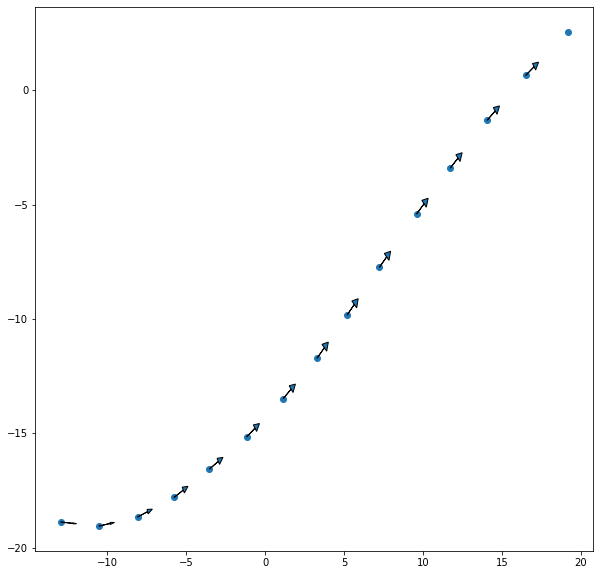

In [238]:
plot_traj(traj)

In [24]:
def argsort(x):
    index  = [i for i, _ in enumerate(x)]
    return sorted(index, key= lambda v:x[v])

In [26]:
argsort([0, 2, 1, 4, -5])

[4, 0, 2, 1, 3]